<a href="https://colab.research.google.com/github/irina-marko/Minimal-metric-dimension/blob/main/VNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import random
from itertools import combinations
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import re

In [2]:
def precompute_shortest_paths(G):
    return dict(nx.all_pairs_shortest_path_length(G))

In [3]:
def is_resolving_set(G, nodes, shortest_paths):
    for u, v in combinations(G.nodes, 2):
        distances_u = [shortest_paths[u][node] for node in nodes]
        distances_v = [shortest_paths[v][node] for node in nodes]

        if not any(dist_u != dist_v for dist_u, dist_v in zip(distances_u, distances_v)):
            return False
    return True

In [4]:
def fitness(G, nodes, shortest_paths):
    if is_resolving_set(G,nodes, shortest_paths):
        return len(nodes)
    else:
        return float('inf')

In [5]:
def local_search_add(solution, G, nodes_list, shortest_paths):
    best_local_solution = solution[:]
    best_local_fitness = fitness(G, solution, shortest_paths)
    candidates = list(set(nodes_list) - set(solution))
    for node in candidates:
        new_solution = solution + [node]
        new_fitness = fitness(G, new_solution, shortest_paths)
        if new_fitness < best_local_fitness:
            best_local_solution = new_solution
            best_local_fitness = new_fitness
    return best_local_solution

def local_search_remove(solution, G, shortest_paths):
    best_local_solution = solution[:]
    best_local_fitness = fitness(G, solution, shortest_paths)
    for i in range(len(solution)):
        new_solution = solution[:i] + solution[i+1:]
        new_fitness = fitness(G, new_solution, shortest_paths)
        if new_fitness < best_local_fitness:
            best_local_solution = new_solution
            best_local_fitness = new_fitness
    return best_local_solution

def local_search_swap(solution, G, nodes_list, shortest_paths):
    best_local_solution = solution[:]
    best_local_fitness = fitness(G, solution, shortest_paths)
    for i in range(len(solution)):
        for node in nodes_list:
            if node not in solution:
                new_solution = solution[:]
                new_solution[i] = node
                new_fitness = fitness(G, new_solution, shortest_paths)
                if new_fitness < best_local_fitness:
                    best_local_solution = new_solution
                    best_local_fitness = new_fitness
    return best_local_solution

def local_search(solution, nodes_list, G, shortest_paths):
    best_solution = solution[:]
    improved = True

    while improved:
        improved = False
        for operation in ['add', 'remove', 'swap']:
            if operation == 'add':
                new_solution = local_search_add(best_solution, G, nodes_list, shortest_paths)
            elif operation == 'remove':
                new_solution = local_search_remove(best_solution, G, shortest_paths)
            elif operation == 'swap':
                new_solution = local_search_swap(best_solution, G, nodes_list, shortest_paths)

            if fitness(G, new_solution, shortest_paths) < fitness(G, best_solution, shortest_paths):
                best_solution = new_solution
                improved = True

    return best_solution

In [6]:

def generate_initial_solution(nodes_list):
    return random.sample(nodes_list, random.randint(1, len(nodes_list)))

def add_node(solution, nodes_list):
    candidates = list(set(nodes_list) - set(solution))
    if candidates:
        new_node = random.choice(candidates)
        return solution + [new_node]
    return solution

def remove_node(solution):
    if solution:
        solution.remove(random.choice(solution))
    return solution

def swap_node(solution, nodes_list):
    if solution:
        candidates = list(set(nodes_list) - set(solution))
        if candidates:
            solution[random.randint(0, len(solution) - 1)] = random.choice(candidates)
    return solution

def shaking(solution, nodes_list):
    operation = random.choice(['add', 'remove', 'swap'])
    if operation == 'add':
        solution = add_node(solution, nodes_list)
    elif operation == 'remove' and solution:
        solution = remove_node(solution)
    elif operation == 'swap' and solution:
        solution = swap_node(solution, nodes_list)
    return solution



In [7]:
def VNS(G, max_iterations=1000, time_limit=0.2):
    start_time = time.time()
    nodes_list = list(G.nodes)
    shortest_paths = precompute_shortest_paths(G)
    current_solution = generate_initial_solution(nodes_list)
    best_solution = current_solution

    for iteration in range(max_iterations):
        if (time.time() - start_time) > time_limit:
            print(f"Time limit of {time_limit} seconds reached.")
            print("Best result set:", best_solution)
            print("Metric dimension:", len(best_solution))
            break

        new_solution = shaking(current_solution, nodes_list)
        improved_solution = local_search(new_solution, nodes_list, G, shortest_paths)

        if fitness(G, improved_solution, shortest_paths) < fitness(G, best_solution, shortest_paths):
            print('New best solution', improved_solution)
            best_solution = improved_solution
            current_solution = improved_solution
        else:
            current_solution = improved_solution

    return best_solution


Linijski graf
Testing graph with nodes: [0, 1, 2, 3, 4]


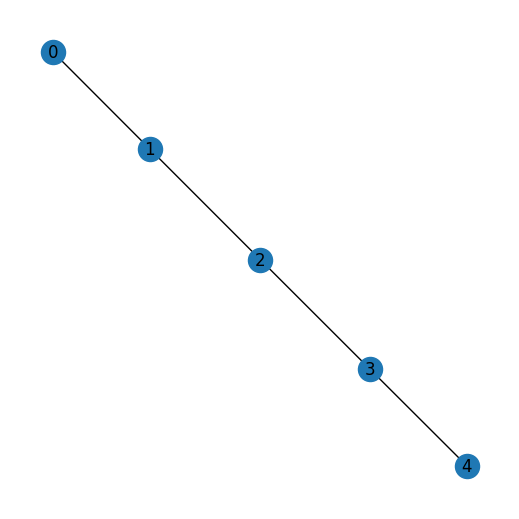


New best solution [0]
Time limit of 0.2 seconds reached.
Best result set: [0]
Metric dimension: 1
VNS execution time: 0.20 seconds

VNS solution:
Minimum resolving set: [0]
Metric dimension: 1


Potpuni graf
Testing graph with nodes: [0, 1, 2, 3]


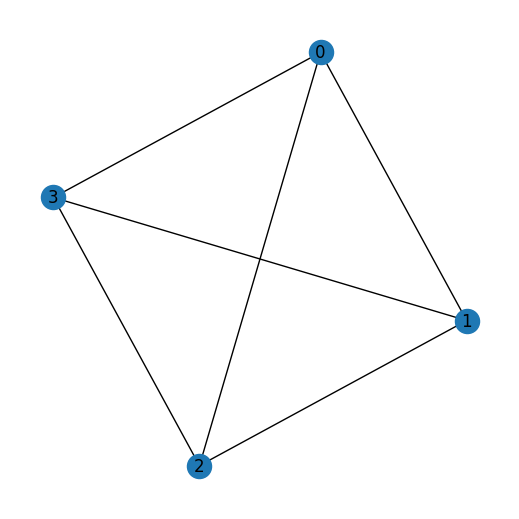


New best solution [3, 0, 1]
New best solution [0, 1, 2]
New best solution [0, 1, 2]
Time limit of 0.2 seconds reached.
Best result set: [0, 1, 2]
Metric dimension: 3
VNS execution time: 0.20 seconds

VNS solution:
Minimum resolving set: [0, 1, 2]
Metric dimension: 3


Ciklični graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5]


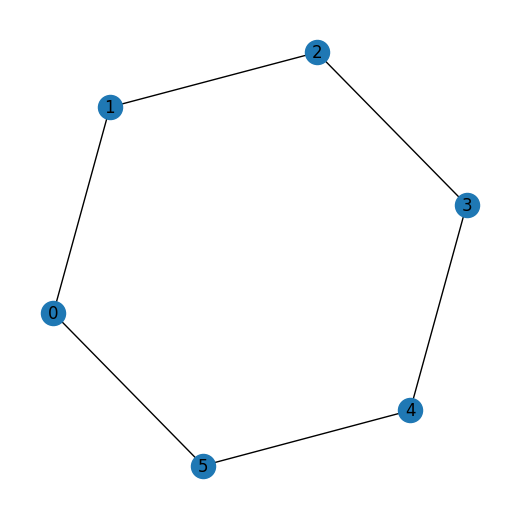


New best solution [1, 2]
Time limit of 0.2 seconds reached.
Best result set: [4, 2]
Metric dimension: 2
VNS execution time: 0.20 seconds

VNS solution:
Minimum resolving set: [4, 2]
Metric dimension: 2


Zvezdasti graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5]


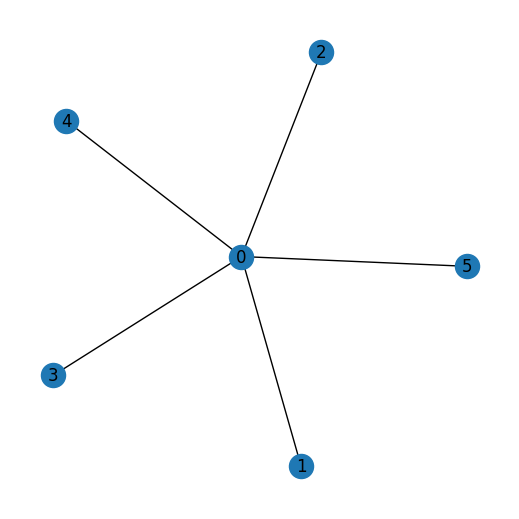


New best solution [4, 5, 3, 1]
Time limit of 0.2 seconds reached.
Best result set: [4, 5, 3, 1]
Metric dimension: 4
VNS execution time: 0.20 seconds

VNS solution:
Minimum resolving set: [4, 5, 3, 1]
Metric dimension: 4


Nasumični graf
Testing graph with nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


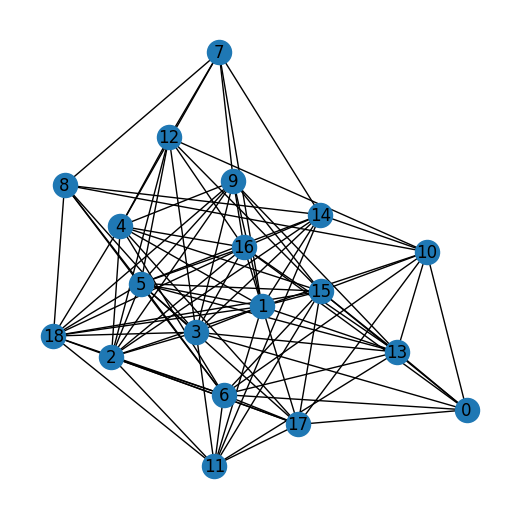


New best solution [8, 16, 18, 17, 11]
Time limit of 0.2 seconds reached.
Best result set: [8, 16, 18, 17, 11]
Metric dimension: 5
VNS execution time: 1.07 seconds

VNS solution:
Minimum resolving set: [8, 16, 18, 17, 11]
Metric dimension: 5




In [8]:

def test_graph(G):
    print("Testing graph with nodes:", G.nodes)
    plt.figure(figsize=(5, 5))
    nx.draw(G, with_labels=True)
    plt.show()
    print()
    start_time = time.time()
    vns_solution = VNS(G)
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Display results
    print(f"VNS execution time: {elapsed_time:.2f} seconds")

    # VNS algoritam

    print("\nVNS solution:")
    print("Minimum resolving set:", vns_solution)
    print("Metric dimension:", len(vns_solution))
    print()

    print()

# Primer 1: Linijski graf
G1 = nx.path_graph(5)
print("Linijski graf")
test_graph(G1)

# Primer 2: Potpuni graf
G2 = nx.complete_graph(4)
print("Potpuni graf")
test_graph(G2)

# Primer 3: Ciklični graf
G3 = nx.cycle_graph(6)
print("Ciklični graf")
test_graph(G3)

# Primer 4: Zvezdasti graf
G4 = nx.star_graph(5)
print("Zvezdasti graf")
test_graph(G4)

# Primer 5: Nasumični graf
######
#TO_DO popraviti da obavezno bude povezan
#####
import random
a=random.randint(5, 20)
G5 = nx.erdos_renyi_graph(a, 0.5)
print("Nasumični graf")
test_graph(G5)
